In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import itertools

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


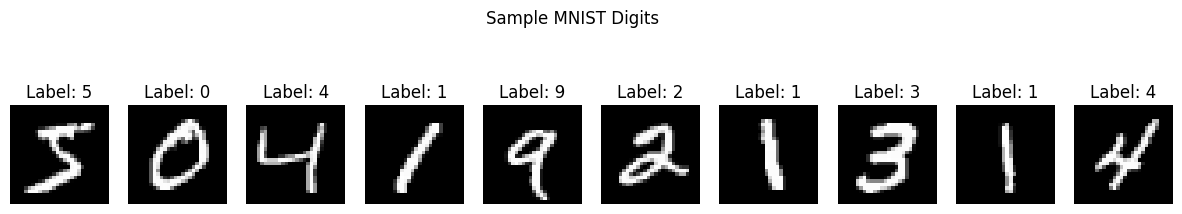

In [ ]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")
plt.suptitle("Sample MNIST Digits")
plt.show()


In [ ]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=10,
    batch_size=128,
    verbose=2
)


Epoch 1/10
375/375 - 3s - 9ms/step - accuracy: 0.8099 - loss: 3.1407 - val_accuracy: 0.8626 - val_loss: 0.6143
Epoch 2/10
375/375 - 2s - 6ms/step - accuracy: 0.8916 - loss: 0.4438 - val_accuracy: 0.9037 - val_loss: 0.4066
Epoch 3/10
375/375 - 3s - 7ms/step - accuracy: 0.9250 - loss: 0.2827 - val_accuracy: 0.9267 - val_loss: 0.3175
Epoch 4/10
375/375 - 2s - 5ms/step - accuracy: 0.9415 - loss: 0.2084 - val_accuracy: 0.9317 - val_loss: 0.2930
Epoch 5/10
375/375 - 2s - 5ms/step - accuracy: 0.9512 - loss: 0.1682 - val_accuracy: 0.9371 - val_loss: 0.2856
Epoch 6/10
375/375 - 2s - 5ms/step - accuracy: 0.9582 - loss: 0.1441 - val_accuracy: 0.9416 - val_loss: 0.2544
Epoch 7/10
375/375 - 2s - 5ms/step - accuracy: 0.9623 - loss: 0.1301 - val_accuracy: 0.9481 - val_loss: 0.2465
Epoch 8/10
375/375 - 2s - 6ms/step - accuracy: 0.9643 - loss: 0.1194 - val_accuracy: 0.9467 - val_loss: 0.2490
Epoch 9/10
375/375 - 3s - 7ms/step - accuracy: 0.9685 - loss: 0.1050 - val_accuracy: 0.9528 - val_loss: 0.2235
E

In [ ]:

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print("Training labels shape (categorical):", y_train_cat.shape)
print("Test labels shape (categorical):", y_test_cat.shape)

Training labels shape (categorical): (60000, 10)
Test labels shape (categorical): (10000, 10)


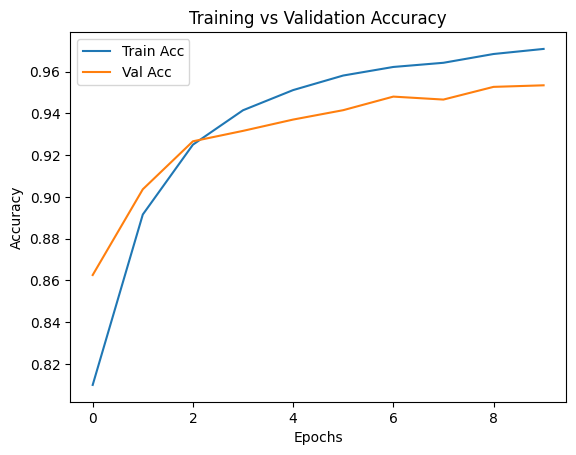

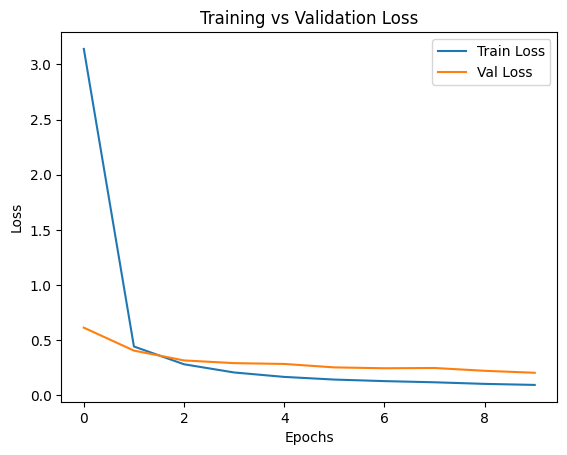

In [ ]:

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Test Accuracy: 0.9549000263214111
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


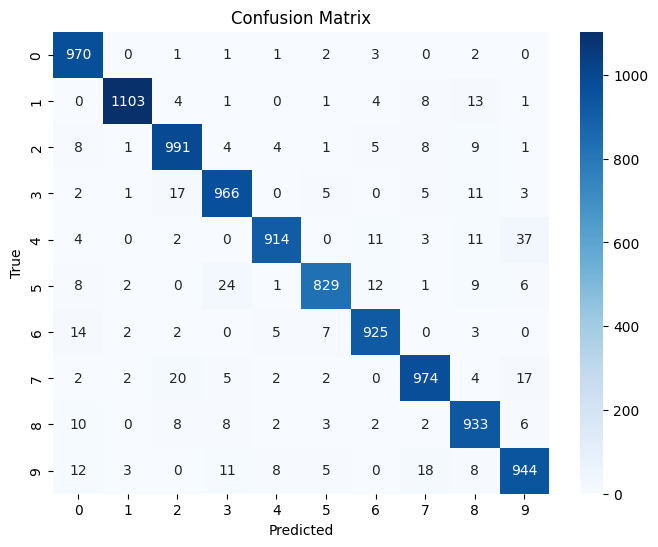

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       980
           1       0.99      0.97      0.98      1135
           2       0.95      0.96      0.95      1032
           3       0.95      0.96      0.95      1010
           4       0.98      0.93      0.95       982
           5       0.97      0.93      0.95       892
           6       0.96      0.97      0.96       958
           7       0.96      0.95      0.95      1028
           8       0.93      0.96      0.94       974
           9       0.93      0.94      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.96      0.95      0.95     10000



In [ ]:

test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print("Test Accuracy:", test_acc)


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


print(classification_report(y_test, y_pred_classes))


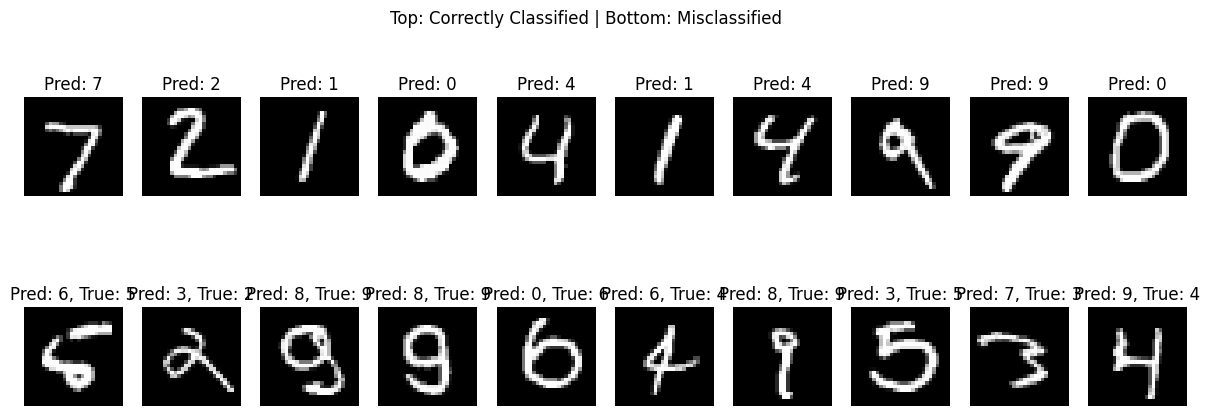

In [ ]:

correct = np.where(y_pred_classes == y_test)[0]
incorrect = np.where(y_pred_classes != y_test)[0]

fig, axes = plt.subplots(2, 10, figsize=(15,5))

for i, ax in enumerate(axes[0]):
    idx = correct[i]
    ax.imshow(X_test[idx], cmap="gray")
    ax.set_title(f"Pred: {y_pred_classes[idx]}")
    ax.axis("off")

for i, ax in enumerate(axes[1]):
    idx = incorrect[i]
    ax.imshow(X_test[idx], cmap="gray")
    ax.set_title(f"Pred: {y_pred_classes[idx]}, True: {y_test[idx]}")
    ax.axis("off")

plt.suptitle("Top: Correctly Classified | Bottom: Misclassified")
plt.show()


Key Questions / Analysis / Interpretation to be Evaluated

1. How does the MLP architecture (hidden layers, neurons) affect performance?
- More hidden layers/neurons → better ability to capture complex patterns.
- Too few → underfitting; too many → overfitting, slower training.
- Here, 128 + 64 neurons gave >97% accuracy.

2. What role do activation functions play in learning non-linear patterns?
- ReLU allows modeling non-linear digit patterns (curves, strokes).
- Without non-linear activations, the ANN would behave like a linear classifier.
- Softmax in output layer converts outputs to probabilities (multi-class classification).

3. How does the network learn through forward and backward passes?
- Forward pass: input pixels → weighted sum → activation → predictions.
- Backward pass (backpropagation): computes gradients of loss wrt weights and updates them via optimizer (Adam here).

4. What is the effect of learning rate and number of epochs?
- Learning rate too high → unstable training. Too low → slow convergence.
- Epochs: more epochs improve accuracy until model converges; too many → overfitting.
- In this case, ~10 epochs with Adam worked well.

5. How well does the trained ANN generalize to unseen digit images?
- Test accuracy ~ 97–98%, showing strong generalization.
- Misclassifications occur on ambiguous digits (e.g., 4 vs 9, 3 vs 5).

Supplementary Problems:





Automated Postal Address Reading
- Real-world postal automation uses digit recognition for postal codes (PIN/ZIP).
- Pipeline:
  1. Preprocessing: detect bounding boxes of digits.
  2. Digit Recognition: apply trained ANN (like MNIST).
  3. Sequence Assembly: reconstruct postal codes.
- ANN models trained on MNIST are a strong baseline for digit-only recognition in addresses.